# Assignment 3: Understanding Customer Tipping Behavior

The dataset contains information about restaurant bills and tips. Each row represents one
dining group.

Key variables:
<ul> 
<li> total_bill : total cost of the meal </li>
<li> tip : tip amount </li>
<li> sex : gender of the person paying </li>
<li> smoker : whether the group included smokers </li>
<li> day : day of the week </li>
<li> time : lunch or dinner </li>
<li> size : group size </li>
</ul>

<p> You are a data analyst working for a restaurant chain.
Management is curious about customer tipping behavior and wants data-driven insights: </p>
<ul> 
<li> Do people tip more on weekends? </li>
<li> Does gender or smoking status affect tips? </li>
<li> How does the total bill influence tipping? </li>
</ul>

To answer these questions, you will analyze the famous Tips dataset from Seaborn and
gradually clean, explore, and visualize the data until you reach a meaningful conclusion.

---

## Q1: Loading and Understanding the Dataset (10 marks)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
print(df.shape)
print(df.columns)

(244, 7)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


## Q2: Basic Filtering – Who Tips More? (25 marks)

In [5]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
weekend = df[(df.day == 'Sat') | (df.day == 'Sun')]
weekdays = df[(df.day != 'Sat') & (df.day != 'Sun')]
print("weekend:", weekend.tip.mean(), weekend.total_bill.mean())
print("weekdays:", weekdays.tip.mean(), weekdays.total_bill.mean())

weekend: 3.115276073619632 20.893006134969326
weekdays: 2.7628395061728392 17.55814814814815


<p>By comparing I can say that in weekend the average tip and average total bill is higher which shows that the customers are more likely to come on <b> weekends </b>
</p>

## Q3: Sorting and Identifying High-Value Customers

In [7]:
df.sort_values(by='total_bill', ascending = False, inplace=True)
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


Most of the high value customers come in groups of 3 or 4 or 6 people. This shows that larger bill often came from a group rather than induviduals. 

In [8]:
df.head(10)['size'].value_counts()

size
4    4
3    3
6    1
5    1
2    1
Name: count, dtype: int64

In [9]:
df.head(10).groupby('size')['total_bill'].mean()

size
2    40.55
3    46.82
4    44.97
5    41.19
6    48.17
Name: total_bill, dtype: float64

## Q4: Data Quality Check & Cleaning (10 marks)

In [10]:
df.isna().sum() 

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Missing values can change our mathematical values or cause error. Can give incorrect answers due to the lost data.   

## Q5: Visualization – What Influences Tips?

### Tip vs Total Bill (scatter plot)

<Axes: xlabel='tip', ylabel='total_bill'>

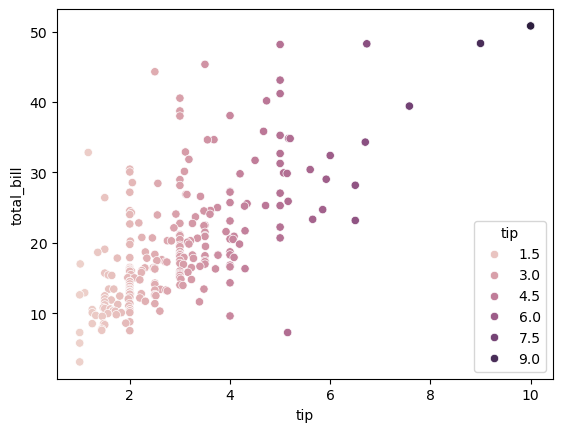

In [11]:
sns.scatterplot(df, x="tip", y="total_bill", hue="tip")

Plot shows that if the total_bill is high, the tip is also will be high. They are interconnected. 

### Average tip by day (bar plot)

<Axes: title={'center': 'Average tip by day'}, xlabel='day', ylabel='tip'>

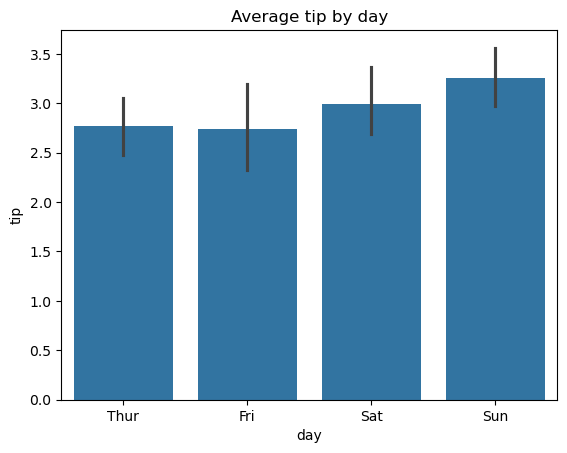

In [12]:
plt.title("Average tip by day")
sns.barplot(df, x="day", y="tip")

Tips on weekends slightly more than weekdays.

### Tip distribution (histogram)

<Axes: xlabel='tip', ylabel='Count'>

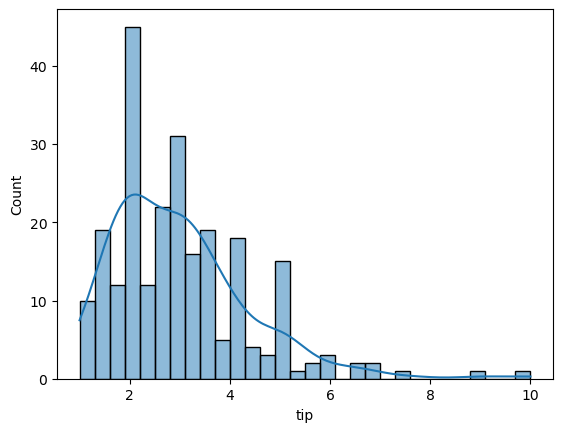

In [13]:
sns.histplot(data=df, x='tip', bins=30, kde=True)

Usually tip is between 2 and 4 dollars and it is skewed to the right, meaning that high tips are rare. 

## Q6: Final Insight & Conclusion (25 marks)

My meaning:
<ul> 
<li>the dataset doesn't have missing values, that gives chance for more accurate results; </li>
<li> If the total bill is higher, the tip is  also will be higher; </li>
<li> The larger bill gets from the group of 3 to 6 people, rather than individuals; </li>
<li> Tips are highest on weekends. </li> 
</ul>
<b> This helps restaurant to focus on staffing on weekend days to accomodate the larger groups. </b>

---

## Own Observation

### Gender

In [14]:
print("10people\n", df.head(10).groupby('sex')[['total_bill', 'tip']].sum(), '\n')
print("100people\n",df.head(100).groupby('sex')[['total_bill', 'tip']].sum(), '\n')
print("All people\n", df.groupby('sex')[['total_bill', 'tip']].sum(), '\n')
num_males = df[df['sex'] == 'Male'].shape[0]
num_fem = 244 - num_males
print(num_males, num_fem)

10people
         total_bill    tip
sex                      
Male        362.84  46.96
Female       87.41   7.50 

100people
         total_bill     tip
sex                       
Male       2048.22  283.73
Female      768.43  106.80 

All people
         total_bill     tip
sex                       
Male       3256.82  485.07
Female     1570.95  246.51 

157 87


This restaurant attracts more male customers than female customers, and they give more total_bill and tip. 

### Time

In [15]:
print(df.head(10).groupby('time')[['total_bill','tip']].mean())
print(df.head(100).groupby('time')[['total_bill','tip']].mean())
print(df.groupby('time')[['total_bill','tip']].mean())

        total_bill     tip
time                      
Lunch     42.15000  5.0000
Dinner    45.74375  5.5575
        total_bill       tip
time                        
Lunch    27.925882  4.152941
Dinner   28.215783  3.854578
        total_bill       tip
time                        
Lunch    17.168676  2.728088
Dinner   20.797159  3.102670


**Dinner** service gets higher average tips and total bills compared to Lunch. This shows that customers spend more during dinner hours.

### Smoker

In [16]:
print("10people\n", df.head(10).groupby('smoker')[['total_bill', 'tip']].mean(), '\n')
print("100people\n", df.head(100).groupby('smoker')[['total_bill', 'tip']].mean(), '\n')
print("All people\n", df.groupby('smoker')[['total_bill', 'tip']].mean())

10people
         total_bill       tip
smoker                      
Yes      44.048333  4.788333
No       46.490000  6.432500 

100people
         total_bill       tip
smoker                      
Yes      29.461190  3.668333
No       27.228966  4.076897 

All people
         total_bill       tip
smoker                      
Yes      20.756344  3.008710
No       19.188278  2.991854


**Rich costumers** that gives higher total_bill and tip, tends to not smoke.

But **generally people** who smoke gives slightly more total_bill and tip, and _difference_ between not smokers is _minimal_

### Result:

<p> In the result of my observation:

Most of the customers are male in all categories. 

**General People:**
<ul>
<li> Usually come to Dinner </li>
<li> Smokers spend slightly more, but the difference is minimal </li>
</ul>

**Rich People, Top 10:**
<ul>
<li> Usually come to Dinner </li>
<li> Non-smokers give significantly higher total bills and tips </li>
</ul>

**Medium, Top 100:**
<ul>
<li> Lunch customers tip slightly more on average </li>
<li> Smokers have higher bills, but non-smokers tip more </li>
</ul>

**Conclusion**

The main target is male and dinner-focused people. 

Smoking has a minimal impact on the average customer, <br>
but slightly different for high-value,non-smoker customers. 

In the mid range, smokers might spend more on food, <br> but non-smokers are spend more on tip. 

Restaurant should target dinner service and <br> non smoking environments to attract the highest spenders.
</p>

<Axes: xlabel='total_bill', ylabel='tip'>

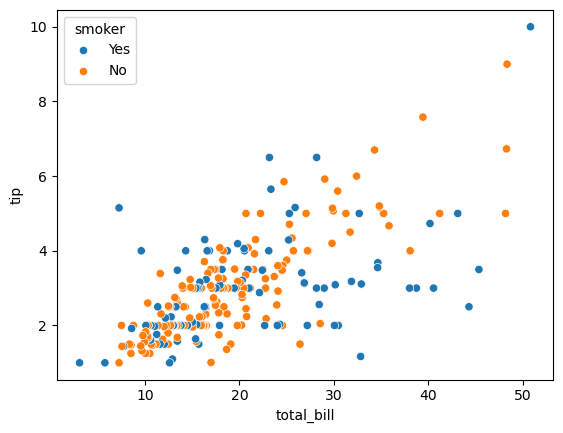

In [17]:
sns.scatterplot(df, x=df['total_bill'], y=df['tip'], hue='smoker')

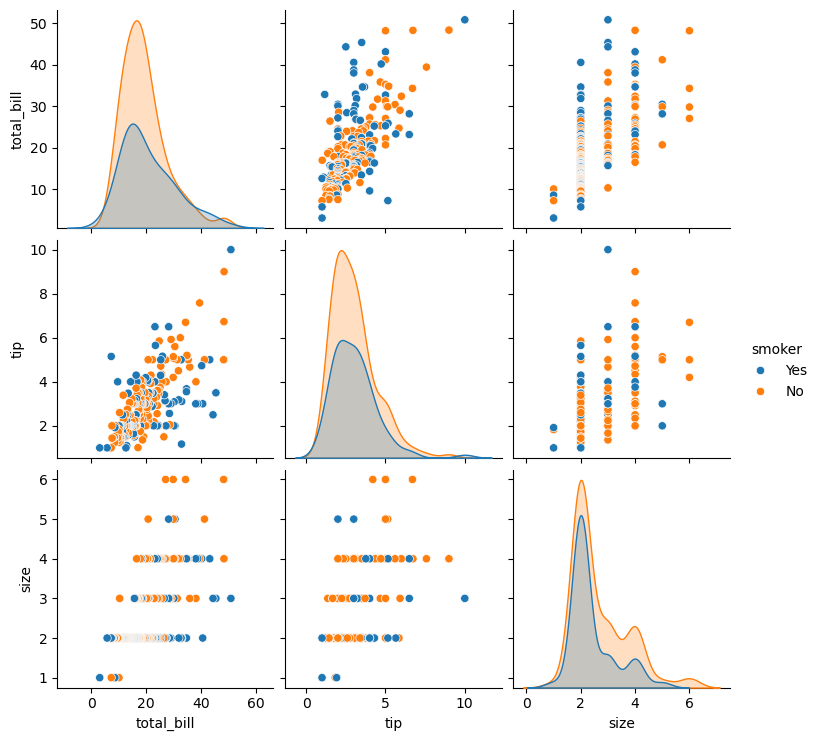

In [ ]:
sns.pairplot(df, hue='smoker')